In [1]:
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Statistics
import scipy.stats as stats
import statsmodels.api as sm

In [2]:
df = pd.read_csv("custom_loan_dataset.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerID       1000 non-null   object 
 1   Gender           950 non-null    object 
 2   Married          950 non-null    object 
 3   ApplicantIncome  950 non-null    float64
 4   LoanAmount       950 non-null    float64
 5   Loan_Approved    1000 non-null   object 
 6   ApplicationDate  1000 non-null   object 
dtypes: float64(2), object(5)
memory usage: 54.8+ KB


# ✅ Step 2: Missing Value Analysis & Imputation

In [4]:
# Pehle har column me kitni missing values hain woh count kar rahe hain.
# Zaroori hota hai yeh step kyunki strategy ussi hisaab se banate hain.

missing_counts = df.isnull().sum()
missing_counts


CustomerID          0
Gender             50
Married            50
ApplicantIncome    50
LoanAmount         50
Loan_Approved       0
ApplicationDate     0
dtype: int64

In [5]:
df.isnull().sum()

# Missing value check kar rahe hain kyunki missing data ko handle karna padta hai analysis se pehle


CustomerID          0
Gender             50
Married            50
ApplicantIncome    50
LoanAmount         50
Loan_Approved       0
ApplicationDate     0
dtype: int64

In [6]:
# Yaha pe hum numerical columns me median se fill kar rahe hain.
# Kyunki median outliers se impact nahi hota.
# Categorical columns me mode se fill kiya – sabse common value se.


# Fill categorical columns with mode
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
df['Married'].fillna(df['Married'].mode()[0], inplace=True)

# Fill numeric columns with median
df['ApplicantIncome'].fillna(df['ApplicantIncome'].median(), inplace=True)
df['LoanAmount'].fillna(df['LoanAmount'].median(), inplace=True)



In [7]:
#### Verify No Missing Left

df.isnull().sum()


CustomerID         0
Gender             0
Married            0
ApplicantIncome    0
LoanAmount         0
Loan_Approved      0
ApplicationDate    0
dtype: int64

In [8]:
### Next Sub-Step: Date Parsing
#### ApplicationDate is string. Hum usko datetime me convert karenge.

df['ApplicationDate'] = pd.to_datetime(df['ApplicationDate'])


# Let’s go Step 3 – Exploratory Visualization & Univariate Analysis

## A. Univariate Analysis for Numerical Columns

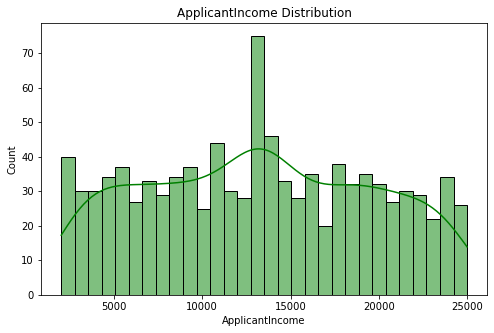

In [9]:
# ApplicantIncome Distribution
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.histplot(df['ApplicantIncome'], bins=30, kde=True, color='green')
plt.title('ApplicantIncome Distribution')
plt.xlabel('ApplicantIncome')
plt.ylabel('Count')
plt.show()



# ✅ Univariate Analysis ka Purpose:

#  Samajhna ki ek variable kaise behave karta hai.
#  Outliers identify karna.
# Data Cleaning aur Preparation.
# Feature Selection mein madad.

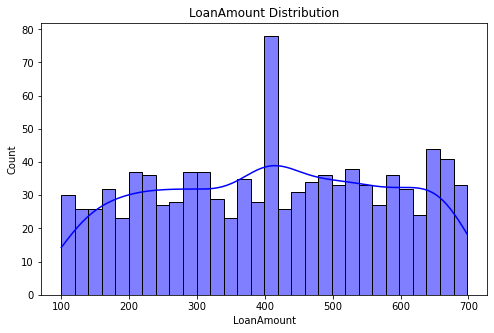

In [10]:
#  LoanAmount Distribution

plt.figure(figsize=(8,5))
sns.histplot(df['LoanAmount'], bins=30, kde=True, color='blue')
plt.title('LoanAmount Distribution')
plt.xlabel('LoanAmount')
plt.ylabel('Count')
plt.show()


# LoanAmount ka spread dekh rahe hain.
# Outlier detect karne me help karta hai.
# Model ko improve karne ke liye scale ya transform bhi kar sakte hain.


## B. Outlier Detection Using Boxplots

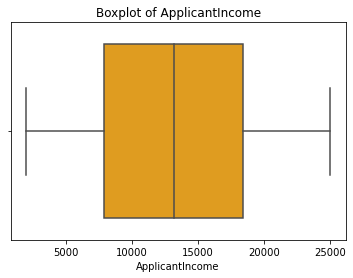

In [11]:
# Boxplot – ApplicantIncome
plt.figure(figsize=(6,4))
sns.boxplot(x=df['ApplicantIncome'], color='orange')
plt.title('Boxplot of ApplicantIncome')
plt.show()


# Boxplot se outlier clearly dikhte hain.
# Median, IQR, upper/lower whiskers identify hote hain.
# Business: Extreme income values fraud or VIP customers ho sakte hain.

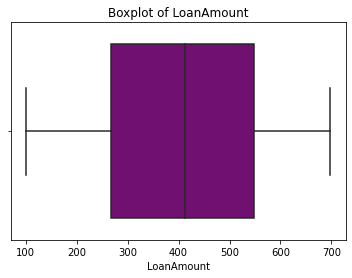

In [12]:
# Boxplot – LoanAmount
plt.figure(figsize=(6,4))
sns.boxplot(x=df['LoanAmount'], color='purple')
plt.title('Boxplot of LoanAmount')
plt.show()

# LoanAmount ke outliers bhi analyze kar rahe hain.
# Data cleaning ke liye strategy banane me madad karta hai.
# ✅ 📌 Fact for Interview:

# Outlier treatment improves model accuracy and robustness.

## C. Univariate Analysis for Categorical Columns

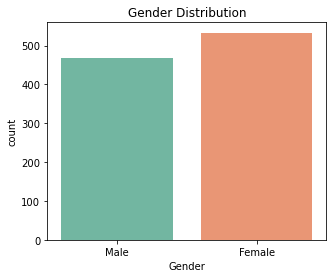

In [13]:
# Gender Countplot
plt.figure(figsize=(5,4))
sns.countplot(x='Gender', data=df, palette='Set2')
plt.title('Gender Distribution')
plt.show()

# Gender distribution dekh rahe hain.
# Imbalanced data model ko biased kar sakta hai.
# Business: Gender-based marketing ya approval policies ban sakti hain.

# ✅ 📌 Fact for Interview:
# Class imbalance impacts model training – might need balancing.

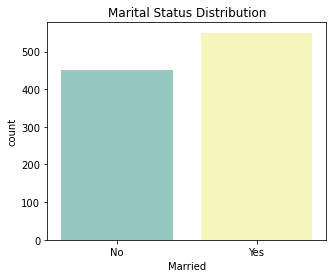

In [14]:
#  Married Countplot
plt.figure(figsize=(5,4))
sns.countplot(x='Married', data=df, palette='Set3')
plt.title('Marital Status Distribution')
plt.show()

# Marital Status distribution bhi check kar rahe hain.
# Business insight: Married applicants ki approval chance dekhna.

# ✅ 📌 Fact for Interview:
# Understanding target demographics is key for marketing and risk policies.

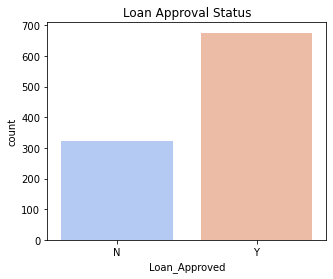

In [15]:
# Loan_Approved Target Variable
plt.figure(figsize=(5,4))
sns.countplot(x='Loan_Approved', data=df, palette='coolwarm')
plt.title('Loan Approval Status')
plt.show()


# Target variable ka balance check kar rahe hain.
# Model ke liye class imbalance bahut important hota hai.

## 🎯 STEP 4: Bivariate / Multivariate Analysis
✅ Objective
✅ Features ke relationships samajhna
✅ Target variable (Loan_Approved) ke saath associations dekhna
✅ Correlation identify karna
✅ Insight nikalna

## Bivariate statistics compare two variables.

## A. Numerical vs Numerical
### 🔎 1️⃣ ApplicantIncome vs LoanAmount
### ✅ Reason:
###✔️ Income badhe toh loan amount bhi badhta hai kya?
###✔️ Business insight: Credit policy design.



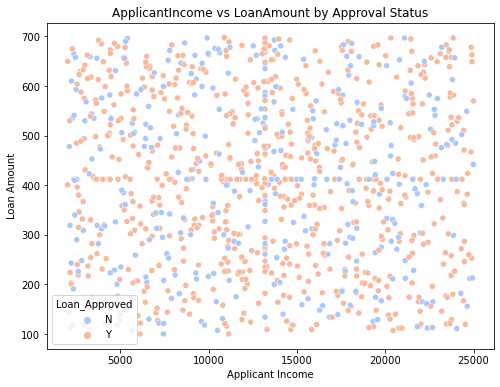

In [16]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='ApplicantIncome', y='LoanAmount', hue='Loan_Approved', data=df, palette='coolwarm')
plt.title('ApplicantIncome vs LoanAmount by Approval Status')
plt.xlabel('Applicant Income')
plt.ylabel('Loan Amount')
plt.show()



#  Fact for Interview:

# Scatterplots help detect linear/nonlinear relationships and class separability.

# B. Categorical vs Target
✅ Business mein bahut zaroori:
✔️ Gender, Married status ka loan approval pe kya impact hai?

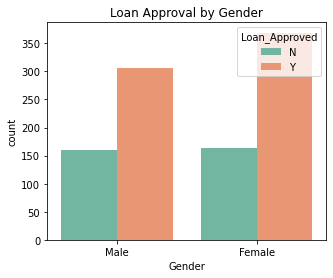

In [17]:
# Gender vs Loan_Approved

plt.figure(figsize=(5,4))
sns.countplot(x='Gender', hue='Loan_Approved', data=df, palette='Set2')
plt.title('Loan Approval by Gender')
plt.show()

# Gender ke hisab se approval rate dekh rahe hain.
# Imbalanced approval policy detect ho sakta hai.
# Business insight: Target marketing ya bias detection.

## C. Correlation Heatmap (Numerical Columns)
✅ Numerical variables ke beech correlation detect karna

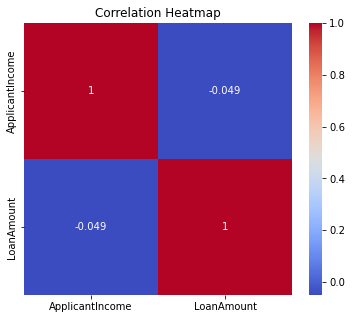

In [18]:
plt.figure(figsize=(6,5))
sns.heatmap(df[['ApplicantIncome','LoanAmount']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Correlation matrix se pata chalta hai variables ka linear relation.
# High correlation → Multicollinearity detect karne me help karta hai.
# ✅ 📌 Fact for Interview:

# Correlation analysis is used to reduce redundancy in features.

# STEP 5: Feature Engineering & Transformation
Feature engineering is the process of converting raw data into meaningful and relevant features that can be used to train a machine learning model. This often involves transforming existing features, creating new ones, or selecting the most important features to improve the model's accuracy, efficiency, and interpretability.


### A. Outlier Treatment
✅ Why?

Outliers model ko biased kar dete hain.

👉 Strategy:
✔️ Capping using IQR method.

In [30]:
def cap_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df[col] = df[col].clip(lower, upper)
    return df

# Apply to income and loan amount
df = cap_outliers(df, 'ApplicantIncome')
df = cap_outliers(df, 'LoanAmount')


# Capping में, आप एक ऊपरी सीमा (upper limit) और एक निचली सीमा (lower limit) तय करते हैं.

# Fact for Interview:
# Capping preserves data size while controlling outlier influence.


### B. Log Transformation
✅ Why?
✔️ To handle skewness
✔️ Normalize distribution

लॉग ट्रांसफॉर्मेशन एक डेटा ट्रांसफॉर्मेशन (data transformation) तकनीक है 
जिसमें डेटासेट के प्रत्येक मान (value) को उसके लघुगणक (logarithm) से बदल दिया जाता है. 
यह विशेष रूप से तब उपयोगी होता है जब डेटा skewed (असममित) होता है, 
यानी एक तरफ बहुत बड़े मान होते हैं, और दूसरी तरफ छोटे मान. 

In [29]:
import numpy as np

df['ApplicantIncome_log'] = np.log1p(df['ApplicantIncome'])
df['LoanAmount_log'] = np.log1p(df['LoanAmount'])


### C. Encoding Categorical Features


In [28]:
# Code – Label Encoding Binary Columns

df['Gender_encoded'] = df['Gender'].map({'Male':1, 'Female':0})
df['Married_encoded'] = df['Married'].map({'Yes':1, 'No':0})
df['Loan_Approved_encoded'] = df['Loan_Approved'].map({'Y':1, 'N':0})

# Binary categorical features ko 0-1 me convert kiya.
# Interview ke liye: Label encoding for binary vars is simple and effective.

### D. Scaling Numerical Features
✅ Why?
✔️ ML models sensitive to scale differences.
✔️ Gradient-based methods converge faster.

In [27]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[['ApplicantIncome_scaled', 'LoanAmount_scaled']] = scaler.fit_transform(df[['ApplicantIncome', 'LoanAmount']])

# Numerical features ko standard scale kiya (mean=0, std=1).
# Interview: Scaling prevents features with large values from dominating.

### E. Final Check – Processed Data

In [26]:
df_final = df[[
    'CustomerID',
    'ApplicantIncome_scaled',
    'LoanAmount_scaled',
    'Gender_encoded',
    'Married_encoded',
    'Loan_Approved_encoded',
    'ApplicationDate'
]]
df_final.head()


# Final cleaned and processed dataframe.
# Ab yeh data modeling ke liye ready hai.


,CustomerID,ApplicantIncome_scaled,LoanAmount_scaled,Gender_encoded,Married_encoded,Loan_Approved_encoded,ApplicationDate
0,CUST0001,1.453192,1.021414,1,0,0,2023-01-01
1,CUST0002,-1.537066,1.234214,0,1,1,2023-01-02
2,CUST0003,0.104687,-0.917426,0,1,0,2023-01-03
3,CUST0004,-1.693684,-1.289825,1,1,0,2023-01-04
4,CUST0005,-0.825963,0.016527,1,1,1,2023-01-05
